In [16]:
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

#### Chapter wise polarity analysis.

Let's create a dict with the chapter filenames as keys and the chapter text as values.

But first we need to replace the chapter names with the correct chapter order

In [4]:
# same function in test_eda.ipynb so need to put this in one place in the the scripts
def chapter_order(filename):

    book_number = filename.split('_')[0]
    chapter_number = filename.split('_')[2].zfill(2)
    new_name = book_number + '.' + chapter_number
    
    return new_name

In [5]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_lemma'

mb_chapter_texts = {}

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_chapter_texts[chapter_order(filename)] = chapter_text

In [6]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

ir_dir = '../2_Text_Preprocessing/IR_Chapters_lemma'

ir_chapter_texts = {}

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_chapter_texts[chapter_order(filename)] = chapter_text

now, create a list of chapter sentiments

In [7]:
# for the MB series

analyzer = SentimentIntensityAnalyzer()

mb_chapter_sentiments = {}

for chapter in mb_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(mb_chapter_texts[chapter])
    mb_chapter_sentiments[chapter] = sentiment_score

In [8]:
# for the IR series

analyzer = SentimentIntensityAnalyzer()

ir_chapter_sentiments = {}

for chapter in ir_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(ir_chapter_texts[chapter])
    ir_chapter_sentiments[chapter] = sentiment_score

Converting the scores in dataframes

In [9]:
mb_sentiment_df = pd.DataFrame(mb_chapter_sentiments).T
mb_sentiment_df.sort_index(inplace=True)
# encountering the same chapter numbering problem here.

In [10]:
ir_sentiment_df = pd.DataFrame(ir_chapter_sentiments).T
ir_sentiment_df.sort_index(inplace=True)

Plotting the sentiment scores now

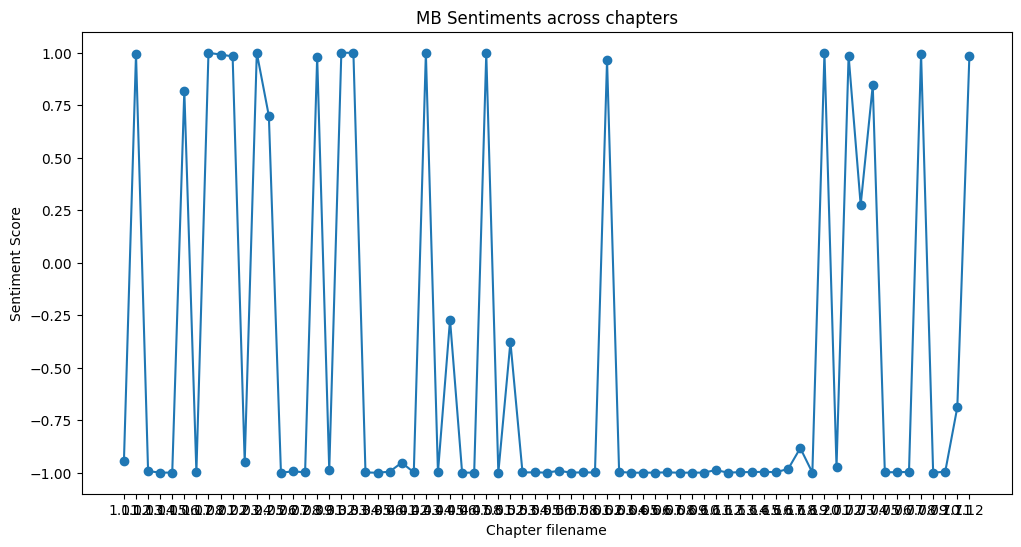

In [12]:
# MB series

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(mb_sentiment_df.index, mb_sentiment_df['compound'], marker='o')
plt.title('MB Sentiments across chapters')
plt.xlabel('Chapter filename')
plt.ylabel('Sentiment Score')
plt.show()

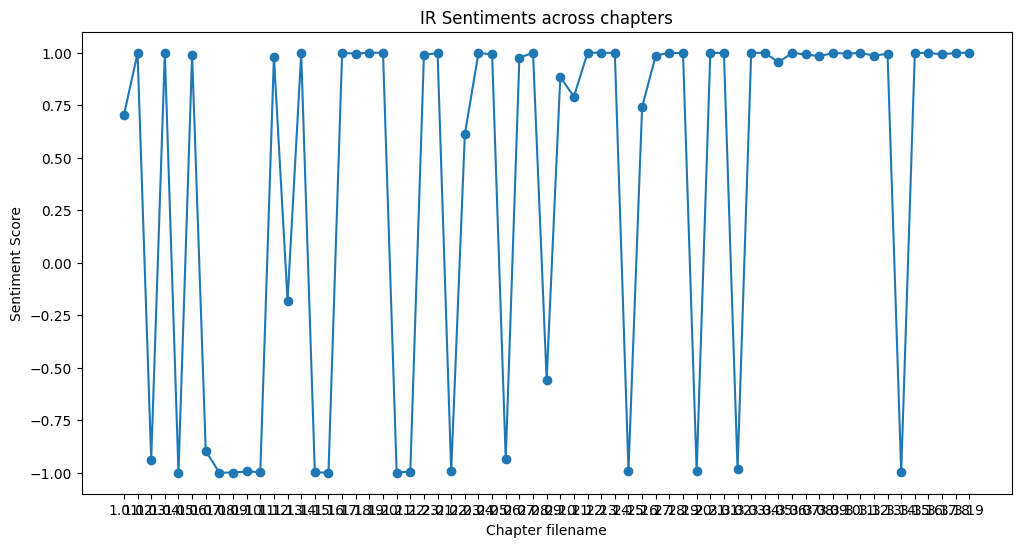

In [13]:
# IR series

fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(ir_sentiment_df.index, ir_sentiment_df['compound'], marker='o')
plt.title('IR Sentiments across chapters')
plt.xlabel('Chapter filename')
plt.ylabel('Sentiment Score')
plt.show()

Okay before i move on, need to solve the chapter order problem. the figure above is really ugly but shows the problem that if i want to compare chapters i need to number them accordingly. tho ugly, i can see overall positive sentiment is there more in the IR series than MB series. which is very unexpected. i thought IR was more depressing. 

In [20]:
mb_sentiment_df['mb_chap_num'] = np.arange(1,len(mb_sentiment_df)+1)
mb_sentiment_df

,neg,neu,pos,compound,mb_chap_num
1.01,0.152,0.707,0.141,-0.9453,1
1.02,0.113,0.750,0.137,0.9929,2
1.03,0.139,0.749,0.112,-0.9920,3
1.04,0.158,0.733,0.109,-0.9994,4
1.05,0.167,0.705,0.127,-0.9991,5
...,...,...,...,...,...
7.08,0.119,0.733,0.148,0.9945,67
7.09,0.156,0.726,0.117,-0.9996,68
7.10,0.134,0.748,0.118,-0.9949,69
7.11,0.139,0.721,0.141,-0.6887,70


In [19]:
ir_sentiment_df['ir_chap_num'] = np.arange(1, len(ir_sentiment_df)+1)
ir_sentiment_df

,neg,neu,pos,compound,ir_chap_num
1.01,0.113,0.763,0.124,0.7029,1
1.02,0.104,0.765,0.131,0.9973,2
1.03,0.115,0.777,0.108,-0.9388,3
1.04,0.121,0.720,0.159,0.9993,4
1.05,0.166,0.702,0.131,-0.9990,5
...,...,...,...,...,...
3.15,0.117,0.700,0.184,0.9995,59
3.16,0.126,0.708,0.166,0.9983,60
3.17,0.145,0.695,0.160,0.9923,61
3.18,0.105,0.747,0.148,0.9986,62


In [21]:
merge_df = pd.merge(mb_sentiment_df[['mb_chap_num', 'compound']], 
                     ir_sentiment_df[['ir_chap_num', 'compound']], 
                     how='left', left_on='mb_chap_num',
                     right_on='ir_chap_num', 
                     suffixes=['_mb', '_ir'])
merge_df

,mb_chap_num,compound_mb,ir_chap_num,compound_ir
0,1,-0.9453,1.0,0.7029
1,2,0.9929,2.0,0.9973
2,3,-0.9920,3.0,-0.9388
3,4,-0.9994,4.0,0.9993
4,5,-0.9991,5.0,-0.9990
...,...,...,...,...
66,67,0.9945,NaN,NaN
67,68,-0.9996,NaN,NaN
68,69,-0.9949,NaN,NaN
69,70,-0.6887,NaN,NaN


In [23]:
merge_df['mb_chap_num'] = merge_df['mb_chap_num'].astype('float64')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mb_chap_num  71 non-null     float64
 1   compound_mb  71 non-null     float64
 2   ir_chap_num  63 non-null     float64
 3   compound_ir  63 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


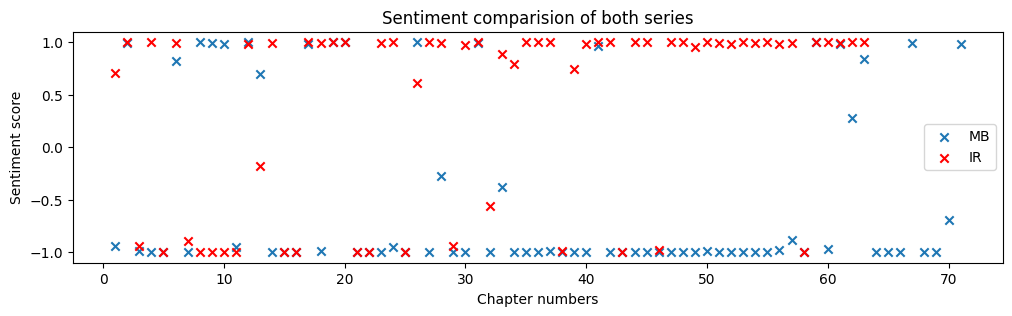

In [30]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.scatter(merge_df['mb_chap_num'], merge_df['compound_mb'], marker='x', label='MB')
ax.scatter(merge_df['ir_chap_num'], merge_df['compound_ir'], marker='x', color='red', label='IR')
ax.set_title('Sentiment comparision of both series')
ax.set_xlabel('Chapter numbers')
ax.set_ylabel('Sentiment score')
ax.legend()
plt.show();